In [659]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-sentiment-analysis/data.csv


In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.utils import resample

import re

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

from tensorflow import keras
from keras import layers
np.set_printoptions(suppress=True)

In [661]:
data=pd.read_csv("/kaggle/input/financial-sentiment-analysis/data.csv")
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [662]:
data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

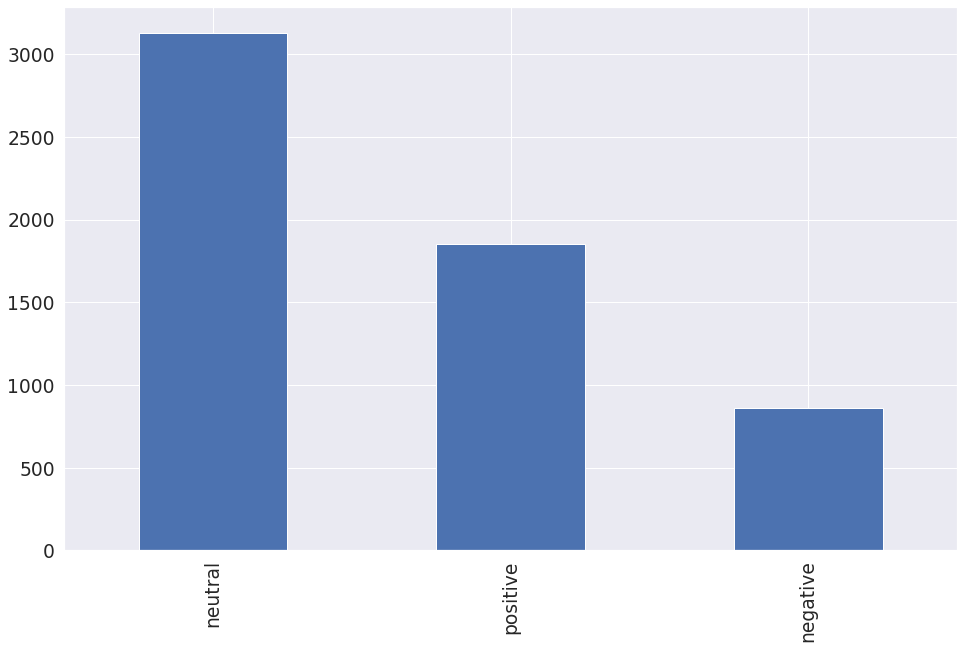

In [663]:
data['Sentiment'].value_counts().plot(kind='bar',figsize=(16,10))
plt.show()

In [664]:
olumlu=[i for i in range(len(data["Sentiment"])) if str(data.loc[i,"Sentiment"])=="positive"]
olumsuz=[i for i in range(len(data["Sentiment"])) if str(data.loc[i,"Sentiment"])=="negative"]
nötr=[i for i in range(len(data["Sentiment"])) if str(data.loc[i,"Sentiment"])=="neutral"]


In [665]:
olumlu_df=data.loc[olumlu,:]
olumsuz_df=data.loc[olumsuz,:]
nötr_df=data.loc[nötr,:]
olumlu_df=olumlu_df.reset_index(drop=True)
olumsuz_df=olumsuz_df.reset_index(drop=True)
nötr_df=nötr_df.reset_index(drop=True)

In [666]:
olumlu_df=olumlu_df.loc[:860,:]
olumsuz_df=olumsuz_df.loc[:860,:]
nötr_df=nötr_df.loc[:860,:]

In [667]:
data=pd.concat([olumlu_df, olumsuz_df ,nötr_df ], ignore_index=True)

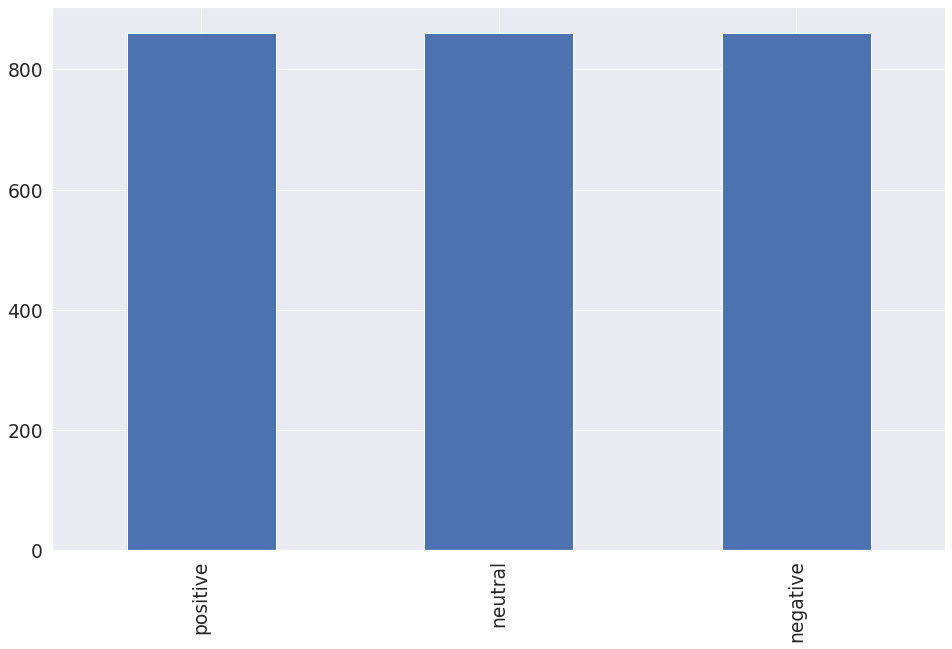

In [668]:
data['Sentiment'].value_counts().plot(kind='bar',figsize=(16,10))
plt.show()

In [669]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("Sentiment")


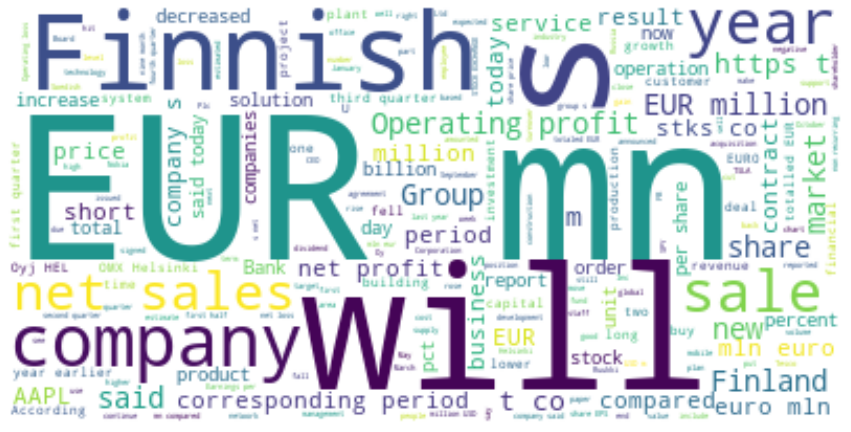

In [670]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
text = " ".join(i for i in data.Sentence)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [671]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(data)):
    
    review = re.sub('[^a-zA-Z]', ' ', data['Sentence'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('down')
    all_stopwords.remove('under')
    all_stopwords.remove('below')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [672]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [673]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [674]:
unique, counts = np.unique(y_test, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 174]
 [  1 185]
 [  2 158]]


In [675]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add( tf.keras.layers.Dropout(0.20))



model.add(tf.keras.layers.Dense(3, activation="softmax"))
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [676]:
y_train = to_categorical(y_train,3)
results = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
65/65 [==============================] - 1s 6ms/step - loss: 1.0900 - accuracy: 0.3792
Epoch 2/10
65/65 [==============================] - 0s 6ms/step - loss: 0.9985 - accuracy: 0.5332
Epoch 3/10
65/65 [==============================] - 0s 6ms/step - loss: 0.7215 - accuracy: 0.7211
Epoch 4/10
65/65 [==============================] - 0s 7ms/step - loss: 0.5170 - accuracy: 0.8276
Epoch 5/10
65/65 [==============================] - 0s 6ms/step - loss: 0.3595 - accuracy: 0.8770
Epoch 6/10
65/65 [==============================] - 0s 6ms/step - loss: 0.2962 - accuracy: 0.8896
Epoch 7/10
65/65 [==============================] - 0s 6ms/step - loss: 0.2424 - accuracy: 0.9099
Epoch 8/10
65/65 [==============================] - 0s 6ms/step - loss: 0.1799 - accuracy: 0.9240
Epoch 9/10
65/65 [==============================] - 0s 6ms/step - loss: 0.1705 - accuracy: 0.9240
Epoch 10/10
65/65 [==============================] - 0s 6ms/step - loss: 0.1548 - accuracy: 0.9370


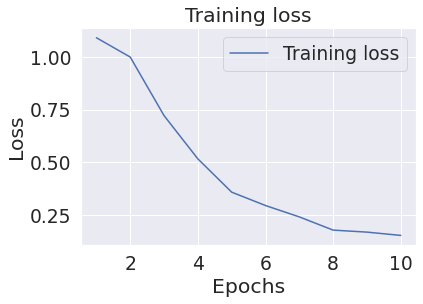

In [677]:
loss = results.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

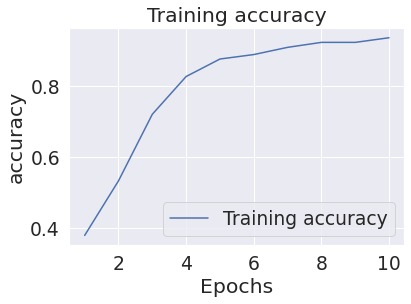

In [678]:
loss = results.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [679]:
y_pred = model.predict(X_train)

In [680]:
y_pred

array([[0.00006916, 0.00006618, 0.9998647 ],
       [0.00000175, 0.99999785, 0.0000003 ],
       [0.00000002, 0.00000002, 1.        ],
       ...,
       [0.00016049, 0.00018762, 0.9996519 ],
       [0.        , 0.        , 1.        ],
       [0.99897385, 0.00096834, 0.00005782]], dtype=float32)

In [681]:
corpus.append(("stock market will rise"))
corpus.append(("think stock market  stabil these days"))
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [682]:
y_pred = model.predict(X)

In [683]:
y_pred[2582]

array([0.25749627, 0.14445268, 0.598051  ], dtype=float32)

In [684]:
y_pred[2583]

array([0.10975941, 0.79872566, 0.09151498], dtype=float32)

In [685]:
corpus.append(("think stock market gonna crush down very hard"))
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
y_pred = model.predict(X)

In [686]:
y_pred[2584]

array([0.52684885, 0.34427413, 0.12887701], dtype=float32)